## Importe de bibliotecas

In [1]:
import multiprocessing

from gensim.models import Word2Vec

import pandas as pd

from gensim import utils
from gensim.test.utils import datapath

from time import time

## Carga de datos

In [2]:
list_lemas = open("../../../Data/mydata/lemas_completos.txt").read().split()

## Verificacion datos

In [3]:
list_lemas

['diagnostico',
 'impacto',
 'iniciativas',
 'emprendedoras',
 'egresados',
 'programa',
 'diseno',
 'industrial',
 'universidad',
 'narino',
 'emprendimiento',
 'acepciones',
 'capacidad',
 'humana',
 'basica',
 'dar',
 'soluciones',
 'afrontar',
 'situaciones',
 'manera',
 'ma',
 'conveniente',
 'buscando',
 'beneficio',
 'individual',
 'colectivo',
 'propositos',
 'alcances',
 'beneficios',
 'crecimiento',
 'desarrollo',
 'solamente',
 'impactos',
 'nivel',
 'local',
 'sino',
 'tambien',
 'sociedad',
 'general',
 'asociado',
 'emprendimiento',
 'emprendedor',
 'catalogan',
 'individuo',
 'dispuesto',
 'cambio',
 'innovador',
 'flexible',
 'dinamico',
 'capaz',
 'asumir',
 'riesgos',
 'enfrentado',
 'incertidumbre',
 'creativo',
 'dispuesto',
 'trabajo',
 'equipo',
 'orientado',
 'crecimiento',
 'ejercer',
 'emprendimiento',
 'ser',
 'emprendedor',
 'implica',
 'tambien',
 'participar',
 'ecosistema',
 'emprendedor',
 'conjunto',
 'relaciones',
 'complejas',
 'entidades',
 'persona',

In [4]:
len(list_lemas)

93950

## Bigramas

In [ ]:
# from gensim.models.phrases import Phrases, Phraser

In [ ]:
# phrases = Phrases(lemas_corpus_docentes_spliteados, min_count=30, progress_per=10000)

In [ ]:
# bigram = Phraser(phrases)

In [ ]:
# sentences = bigram[lemas_corpus_docentes_spliteados]

## Fase entrenamiento Word2vec

In [4]:
def entrenamiento_parametros_1(lista_materia_prima,epocas):
    
    modelo = Word2Vec(min_count=1,
                         window=2,
                         size=10,
    #                      sample=0, 
                         alpha=0.01, 
                         min_alpha=0.0, 
                         negative=100,
                         workers=8,
                         sg=1
                      )

    t = time()

    vocabulario = modelo.build_vocab([lista_materia_prima], progress_per=10000)
    print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

    t = time()
    
    entrenamiento = modelo.train([lista_materia_prima], total_examples=modelo.corpus_count, epochs=epocas, report_delay=1)
    print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

    return modelo

## MODELO 1

In [6]:
modelo1 = entrenamiento_parametros_1(list_lemas,150)

Time to build vocab: 0.05 mins
Time to train the model: 0.94 mins


In [9]:
modelo1.save('modelo1.model')

In [10]:
modelo1_cargado = Word2Vec.load('modelo1.model')

## MODELO 2

In [12]:
modelo2 = entrenamiento_parametros_1(list_lemas,200)

Time to build vocab: 0.05 mins
Time to train the model: 1.11 mins


In [13]:
modelo2.save('modelo2.model')

In [14]:
modelo2_cargado = Word2Vec.load('modelo2.model')

## MODELO 3

In [21]:
modelo3 = entrenamiento_parametros_1(list_lemas,250)

Time to build vocab: 0.05 mins
Time to train the model: 1.5 mins


In [22]:
modelo3.save('modelo3.model')

In [23]:
modelo3_cargado = Word2Vec.load('modelo3.model')

## MODELO 4

In [39]:
modelo4 = entrenamiento_parametros_1(list_lemas,300)

Time to build vocab: 0.05 mins
Time to train the model: 1.7 mins


In [40]:
modelo4.save('modelo4.model')

In [15]:
modelo4_cargado = Word2Vec.load('../../../Models/my_models/modelos_notebook_entrenamiento_3/modelo4.model')

## Exploración de modelo

In [16]:
modelo4_cargado.wv.most_similar(positive=['universidad'], topn=20)

[('curriculo', 0.9644822478294373),
 ('colombiana', 0.9644532203674316),
 ('modo', 0.9569042921066284),
 ('narino', 0.9557758569717407),
 ('familiarizarlos', 0.9557143449783325),
 ('adscritos', 0.9538511037826538),
 ('docentes', 0.9490258693695068),
 ('interesado', 0.9484561681747437),
 ('variacional', 0.9417746663093567),
 ('lengua', 0.9356677532196045),
 ('general', 0.9337408542633057),
 ('facultad', 0.9326074719429016),
 ('implica', 0.931709885597229),
 ('senalan', 0.9297250509262085),
 ('instituciones', 0.929675817489624),
 ('jugado', 0.9287514686584473),
 ('resumen', 0.9238662123680115),
 ('ley', 0.9236546754837036),
 ('estudiante', 0.9226484298706055),
 ('participes', 0.9214977025985718)]

In [18]:
modelo4_cargado.wv.most_similar(positive=['inteligencia'], topn=20)

[('computacional', 0.9831177592277527),
 ('herramientas', 0.9692230224609375),
 ('antioxidantes', 0.9565176963806152),
 ('permanente', 0.9461259841918945),
 ('motivos', 0.9442991614341736),
 ('antiinflamatorias', 0.9406591057777405),
 ('participativas', 0.9382085800170898),
 ('aumentada', 0.9372600317001343),
 ('usar', 0.9330557584762573),
 ('motivante', 0.9301856756210327),
 ('esparcidas', 0.9281688928604126),
 ('computacionales', 0.9279363751411438),
 ('sensoriales', 0.9269733428955078),
 ('discretizaciones', 0.9265273809432983),
 ('matices', 0.9256248474121094),
 ('ortiz', 0.9244009256362915),
 ('conlleven', 0.92369544506073),
 ('interdisciplinar', 0.922787606716156),
 ('mediciones', 0.9213958978652954),
 ('ventajas', 0.921379566192627)]

In [37]:
modelo2_cargado.wv.most_similar(positive=['narino'], topn=10)

[('departamento', 0.9816769957542419),
 ('docentes', 0.9509642720222473),
 ('colombiana', 0.9499539136886597),
 ('universidad', 0.9437353610992432),
 ('socioeconomicas', 0.9356064796447754),
 ('ley', 0.9350773096084595),
 ('variacional', 0.9326499104499817),
 ('adscritos', 0.9296883344650269),
 ('situada', 0.9295675158500671),
 ('estudios', 0.92933189868927)]

In [38]:
modelo3_cargado.wv.most_similar(positive=['narino'], topn=10)

[('departamento', 0.9815517663955688),
 ('docentes', 0.9578927755355835),
 ('universidad', 0.9503735303878784),
 ('variacional', 0.9404077529907227),
 ('instituciones', 0.9391505718231201),
 ('colombiana', 0.9358203411102295),
 ('investigaciones', 0.9340552091598511),
 ('ley', 0.9275996685028076),
 ('tomado', 0.9274117946624756),
 ('disciplinas', 0.9267522096633911)]

In [23]:
modelo4_cargado.wv.most_similar(positive=['narino'], topn=50)

[('departamento', 0.9779163599014282),
 ('docentes', 0.9624075889587402),
 ('universidad', 0.9557758569717407),
 ('instituciones', 0.9362072944641113),
 ('investigaciones', 0.9358663558959961),
 ('variacional', 0.9335037469863892),
 ('disciplinas', 0.931105375289917),
 ('colombiana', 0.9275851249694824),
 ('tomado', 0.9210136532783508),
 ('curriculo', 0.9196557402610779),
 ('situada', 0.9194179773330688),
 ('adscritos', 0.9192039966583252),
 ('lengua', 0.9175825715065002),
 ('resumen', 0.9165436029434204),
 ('kilometros', 0.9159411191940308),
 ('cereza', 0.9156370162963867),
 ('ley', 0.9141188859939575),
 ('realizado', 0.9117975234985352),
 ('dispone', 0.9117189645767212),
 ('revisaron', 0.907142162322998),
 ('inicio', 0.9069175720214844),
 ('estudios', 0.9058206677436829),
 ('acepciones', 0.9033250212669373),
 ('region', 0.9028044939041138),
 ('inter', 0.9006475210189819),
 ('gracias', 0.9004563093185425),
 ('familiarizarlos', 0.9003716111183167),
 ('km', 0.8993996381759644),
 ('socio

In [57]:
modelo4_cargado.wv.similar_by_word('narino', topn=50)

[('departamento', 0.9779163599014282),
 ('docentes', 0.9624075889587402),
 ('universidad', 0.9557758569717407),
 ('instituciones', 0.9362072944641113),
 ('investigaciones', 0.9358663558959961),
 ('variacional', 0.9335037469863892),
 ('disciplinas', 0.931105375289917),
 ('colombiana', 0.9275851249694824),
 ('tomado', 0.9210136532783508),
 ('curriculo', 0.9196557402610779),
 ('situada', 0.9194179773330688),
 ('adscritos', 0.9192039966583252),
 ('lengua', 0.9175825715065002),
 ('resumen', 0.9165436029434204),
 ('kilometros', 0.9159411191940308),
 ('cereza', 0.9156370162963867),
 ('ley', 0.9141188859939575),
 ('realizado', 0.9117975234985352),
 ('dispone', 0.9117189645767212),
 ('revisaron', 0.907142162322998),
 ('inicio', 0.9069175720214844),
 ('estudios', 0.9058206677436829),
 ('acepciones', 0.9033250212669373),
 ('region', 0.9028044939041138),
 ('inter', 0.9006475210189819),
 ('gracias', 0.9004563093185425),
 ('familiarizarlos', 0.9003716111183167),
 ('km', 0.8993996381759644),
 ('socio

In [36]:
modelo4_cargado.wv.similar_by_word('software', topn=50)

KeyError: "word 'cw' not in vocabulary"

In [34]:
modelo4_cargado.wv.most_similar(['metodologia','desarrollo','software'], topn=10)

[('proponer', 0.9606326818466187),
 ('sino', 0.9584302306175232),
 ('realizada', 0.9584100246429443),
 ('investigar', 0.9539248943328857),
 ('contexto', 0.9537368416786194),
 ('faciliten', 0.9486849308013916),
 ('aspecto', 0.9484339952468872),
 ('constituido', 0.9481306672096252),
 ('interes', 0.9464192986488342),
 ('proceso', 0.9448190927505493)]

In [27]:
modelo4_cargado.wv.most_similar(['mineria','de','datos'], topn=10)

[('industria', 0.9533564448356628),
 ('termodilucion', 0.9389338493347168),
 ('introduccion', 0.9368389844894409),
 ('evlwi', 0.9258934855461121),
 ('farmaceutica', 0.9241162538528442),
 ('danos', 0.9211159348487854),
 ('tecnica', 0.9210910797119141),
 ('alimentariaaplicacion', 0.9176934361457825),
 ('matematicaaplicacion', 0.9166985154151917),
 ('medida', 0.9158386588096619)]

In [22]:
modelo4_cargado.wv.doesnt_match(["mineria","datos","volcan"])

/home/grias/anaconda3/envs/tg/lib/python3.8/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'volcan'

In [14]:
modelo4_cargado.wv.similar_by_word('general', topn=5)

[('colombiana', 0.9716425538063049),
 ('adscritos', 0.9597058296203613),
 ('establecer', 0.944048285484314),
 ('involucren', 0.9426010847091675),
 ('biotecnologia', 0.9400156140327454)]

In [58]:
modelo3.wv.similarity('social', "sociedad")

0.7854764

In [59]:
modelo3.wv.similarity('conocimiento', "conocer")

0.85800725

In [61]:
modelo3.wv.similarity('inteligente', "busqueda")

-0.17301846

In [ ]:
modelo3.wv.similarity('agricultura', "motor")

In [ ]:
modelo3.most_similar(positive=['motor', 'busqueda'], negative=['agricultura'], topn=1)

In [ ]:
modelo3.wv.doesnt_match(["conocimiento","conocer","social"])

In [ ]:
modelo3.wv.doesnt_match(["motor","sociedad","social"])

## Visualizacion

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [12]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    counter=0
    for word in model.wv.vocab:
        if counter == 50:
            break
        tokens.append(model[word])
        labels.append(word)
        counter= counter+1
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

<ipython-input-12-6e68307c0209>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


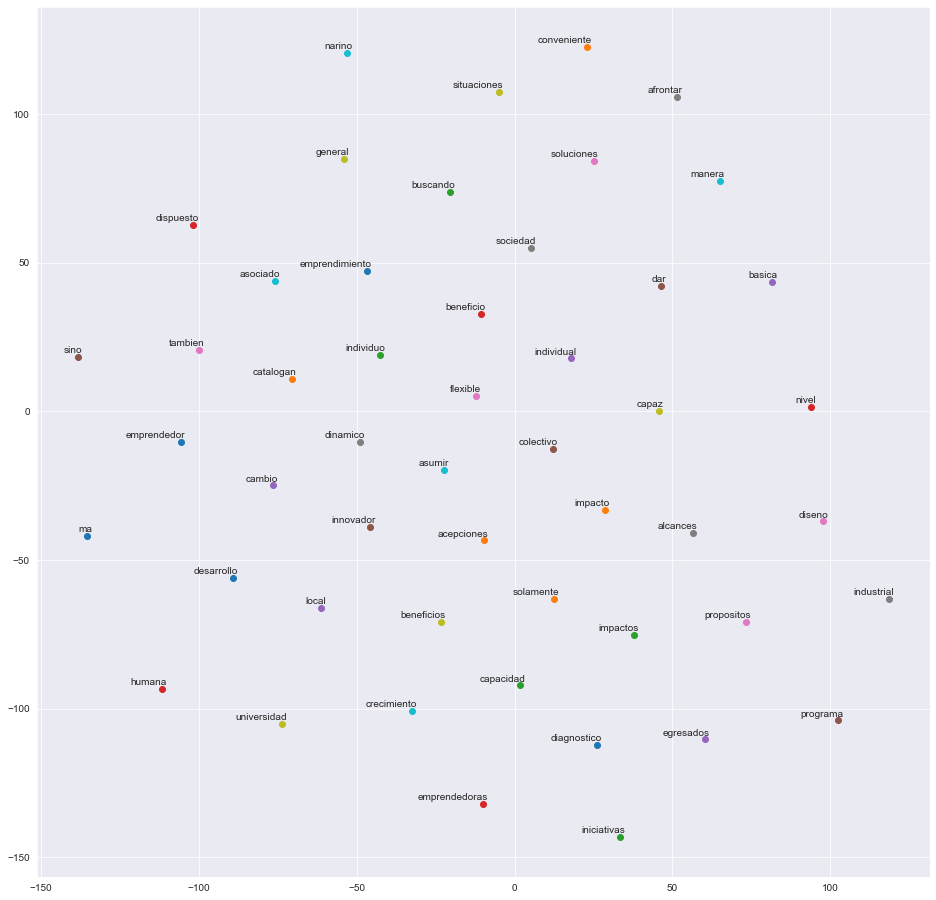

In [13]:
tsne_plot(modelo4_cargado)